In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [409]:
df = pd.read_csv('College_Data')

In [410]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


We will use the labeled data as an unsupervised data to group the data whether it is private and public 

In [411]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [412]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

# Exploratory Data Analysis

# Applications

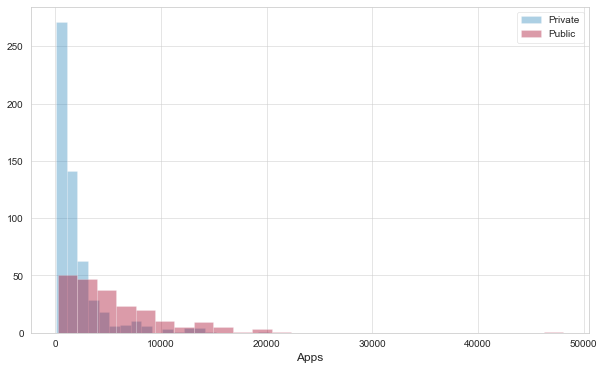

In [413]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(df[df['Private'] == 'Yes']['Apps'], label= 'Private', kde=False,bins=20)
sns.distplot(df[df['Private'] == 'No']['Apps'], label='Public', kde=False)
plt.legend()

# Acceptance Rate

In [414]:
def acc_rate(cols):
    apps = cols[0]
    accept = cols[1]
    return round((accept/apps)*100,2) 

In [415]:
df['accept_rate'] = df[['Apps','Accept']].apply(acc_rate, axis=1)

In [416]:
df[df['Private']=='Yes']['accept_rate'].mean()

75.45807079646012

In [417]:
df[df['Private'] == 'No']['accept_rate'].mean()

72.65301886792452

# Enrollment Rate

In [418]:
def en_rate(cols):
    accept = cols[0]
    enroll = cols[1]
    return round((enroll/accept)*100,2)

In [419]:
df['enroll_rate'] = df[['Accept','Enroll']].apply(en_rate, axis=1)

In [420]:
df[df['Private']=='Yes']['enroll_rate'].mean()

39.324707964601785

In [421]:
df[df['Private']=='No']['enroll_rate'].mean()

46.202028301886756

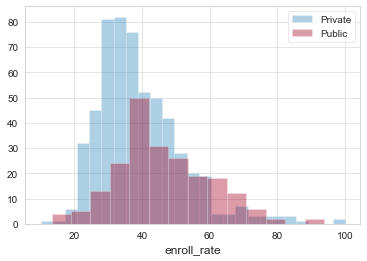

In [422]:
sns.distplot(df[df['Private']=='Yes']['enroll_rate'], kde= False, label='Private')
sns.distplot(df[df['Private']=='No']['enroll_rate'],kde= False, label='Public')
plt.legend()

Public colleges have an higher enrollent rate as compared to public colleges.

# Graduation Rate

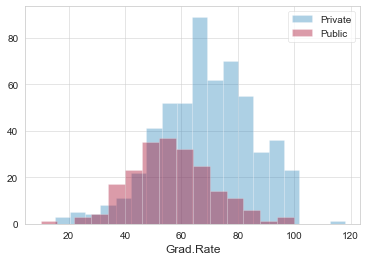

In [423]:
sns.distplot(df[df['Private'] == 'Yes']['Grad.Rate'], kde = False, label = 'Private')
sns.distplot(df[df['Private'] == 'No']['Grad.Rate'], kde = False, label = 'Public')
plt.legend()

# Room Board

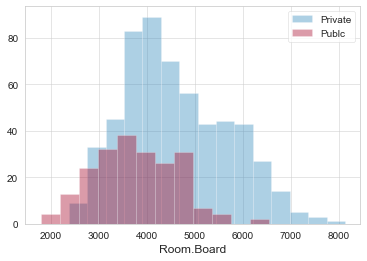

In [424]:
sns.distplot(df[df['Private'] == 'Yes']['Room.Board'], kde = False, label = 'Private')
sns.distplot(df[df['Private'] == 'No']['Room.Board'], kde = False, label = 'Publc')
plt.legend()

In [425]:
def type(a):
    if a == 'Yes':
        return 1
    else:
        return 0

In [426]:
df['coll_type'] = df['Private'].apply(type)

# Scaling

As k means is a distance oriented algoritm , normalizing the data would be good idea.

In [594]:
from sklearn.preprocessing import StandardScaler

In [595]:
scaler = StandardScaler()

In [596]:
data = scaler.fit_transform(df[['Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']])

# K means 

In [531]:
from sklearn.cluster import KMeans

Here we know that the feature contains two clusters and estimator of 2 would be the best n_cluster. But in case of actual unsupervised data elbow method in terms of intertia would provide useful insight 

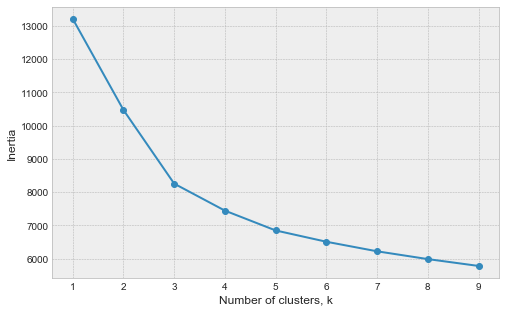

In [597]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [533]:
kmeans = KMeans(n_clusters=2)

In [534]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate', 'accept_rate', 'enroll_rate', 'coll_type'],
      dtype='object')

fitting normalized data to the model 

In [535]:
kmodel = kmeans.fit(data)

In [536]:
kmodel.cluster_centers_

array([[-0.32661962, -0.30530339, -0.25143507, -0.49913749, -0.50267293,
        -0.22105053, -0.03848678, -0.45792911, -0.37283453, -0.12172587,
         0.04875211, -0.49062908, -0.47906195,  0.23583839, -0.30713916,
        -0.42464126, -0.35972387],
       [ 0.54548844,  0.50988814,  0.41992248,  0.83361106,  0.83951561,
         0.36917718,  0.06427689,  0.76478882,  0.6226721 ,  0.20329475,
        -0.08142105,  0.81940114,  0.80008284, -0.39387442,  0.51295406,
         0.70919469,  0.60077594]])

In [537]:
kmodel.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [585]:
from sklearn.metrics import confusion_matrix,classification_report,homogeneity_score, completeness_score, v_measure_score,adjusted_rand_score, silhouette_score

In [587]:
print(confusion_matrix(df['coll_type'],kmodel.labels_))
print(classification_report(df['coll_type'], kmodel.labels_))

[[146  66]
 [340 225]]
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



In [539]:
print('homogeneity_score:',homogeneity_score(df['coll_type'],kmodel.labels_))
print('completeness_score:',completeness_score(df['coll_type'], kmodel.labels_))
print('v_measure_score:',v_measure_score(df['coll_type'], kmodel.labels_))
print('adjusted_rand_score:',adjusted_rand_score(df['coll_type'], kmodel.labels_))
print('silhouette_score:',silhouette_score(data, kmodel.labels_))

homogeneity_score: 0.005550910621942969
completeness_score: 0.004919291875485181
v_measure_score: 0.005216049934234967
adjusted_rand_score: -0.012097811710501125
silhouette_score: 0.22854940273044855


The clustering is not great

# Clustering using PCA

In [542]:
from sklearn.decomposition import PCA

In [591]:
acc_score = []
homo_score = []
v_score = []
scores = {}
for i in range(1,18):
    pca = PCA(n_components=i)
    data_new = pca.fit_transform(df[['Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']])
    model = KMeans(n_clusters=2)
    model.fit(data_new)
    acc_score.append(accuracy_score(df['coll_type'],model.labels_))
    homo_score.append(homogeneity_score(df['coll_type'],model.labels_))
    v_score.append(v_measure_score(df['coll_type'],model.labels_))
scores['n_components'] = range(1,18)    
scores['acuracy'] = acc_score
scores['homogenity_score'] = homo_score
scores['V_score'] = v_score
score_data = pd.DataFrame(scores)

In [592]:
score_data

,n_components,acuracy,homogenity_score,V_score
0,1,0.220077,0.107158,0.126674
1,2,0.779923,0.107158,0.126674
2,3,0.778636,0.104510,0.123837
3,4,0.778636,0.104510,0.123837
4,5,0.221364,0.104510,0.123837
5,6,0.221364,0.104510,0.123837
6,7,0.221364,0.104510,0.123837
7,8,0.221364,0.104510,0.123837
8,9,0.221364,0.104510,0.123837
9,10,0.221364,0.104510,0.123837


In [564]:
pca = PCA(n_components=2)

In [565]:
data_new = pca.fit_transform(df[['Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']])

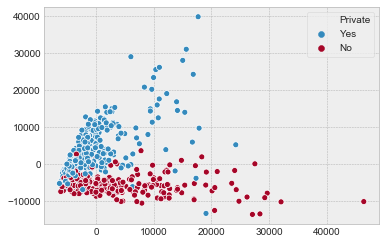

In [579]:
sns.scatterplot(data_new[:,0],data_new[:,1] , hue=df['Private'])

There is alot of overlapping in the plot which is likely to affect the score

In [567]:
model = KMeans(n_clusters=2)

In [568]:
model.fit(data_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [569]:
print(confusion_matrix(df['coll_type'],model.labels_))
print(classification_report(df['coll_type'], model.labels_))

[[ 75 137]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.47       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.65      0.66       777
weighted avg       0.77      0.78      0.75       777



In [580]:
print('homogeneity_score:',homogeneity_score(df['coll_type'],model.labels_))
print('completeness_score:',completeness_score(df['coll_type'], model.labels_))
print('v_measure_score:',v_measure_score(df['coll_type'], model.labels_))
print('adjusted_rand_score:',adjusted_rand_score(df['coll_type'], model.labels_))
print('silhouette_score:',silhouette_score(data, model.labels_))

homogeneity_score: 0.10715753772277213
completeness_score: 0.15488304499074348
v_measure_score: 0.1266741629433674
adjusted_rand_score: 0.23088371867970278
silhouette_score: 0.3550137255404898


This model works better on the data for clustering, there is an increase in the score for the various metrics but it is not a signaficant change.
The silhouette score shows us that there is a better sepration for the two clusters as compared to the previous model.